In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from patch_input_box import *
from run_verifier import *

In [3]:
model_path = "/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx"
test_data_path = "/root/ERAN/data/mnist_test.csv"

images_dir = "/root/Projects/Nathan/Patch-Attack-Verification/images"

In [4]:
# Load the CSV
df = pd.read_csv(test_data_path, header=None)

# Extract labels and image pixels
labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values

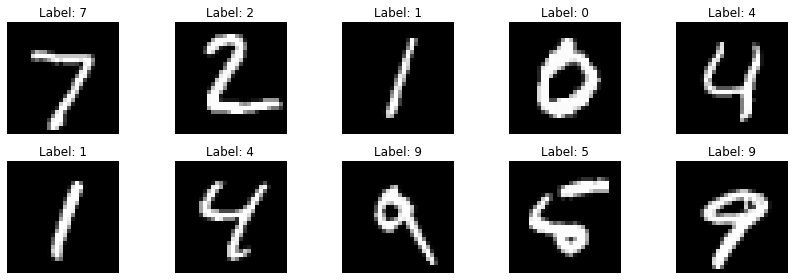

In [5]:
# Display first 10 images
plt.figure(figsize=(12, 4))

for i in range(10):
    img = pixels[i].reshape(28, 28)  # MNIST format
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
# use the first picture
img_index = 1
img = pixels[img_index].reshape(28, 28)
label_img = labels[img_index]

i,j,c = 10, 10, 3  # patch parameters

input_box_path = create_patch_input_config_file(img, i, j, c,label=label_img)

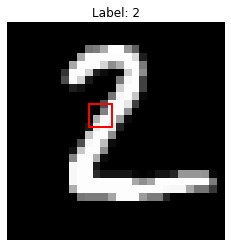

In [7]:
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label_img}")
plt.axis("off")
# draw rectangle for patch
rect = plt.Rectangle((i, j), c, c, edgecolor='red', facecolor='none', linewidth=2)
plt.gca().add_patch(rect)
plt.show()

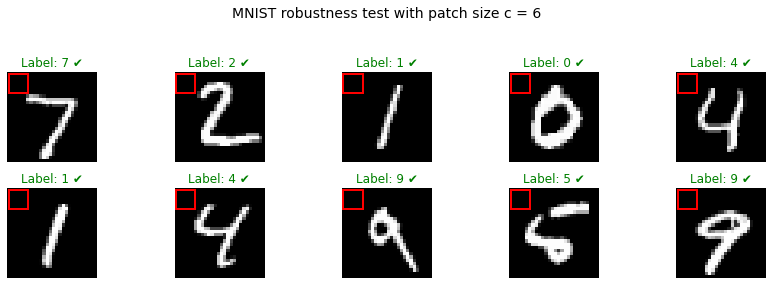

KeyboardInterrupt: 

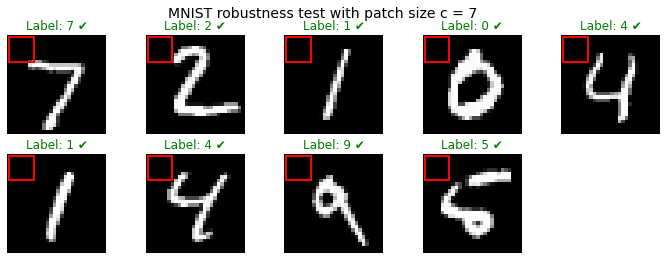

In [8]:
# display figure with 10 digits of mnist
# Display first 10 images
i = 0
j = 0

# Create images directory
images_dir = Path("images")
images_dir.mkdir(exist_ok=True)

for c in range(6, 10):
	plt.figure(figsize=(12, 4))
	plt.suptitle(f"MNIST robustness test with patch size c = {c}", fontsize=14)

	for image_index in range(10):
		img = pixels[image_index].reshape(28, 28)
		label_img = labels[image_index]

		input_box_path = create_patch_input_config_file(img, i, j, c, label=label_img)
		dominant_class = run_eran(input_box_path=input_box_path, domain="deeppoly")

		plt.subplot(2, 5, image_index + 1)
		plt.imshow(img, cmap="gray")

		if labels[image_index] == dominant_class:
			symbol = "✔"
			color = "green"
		else:
			symbol = "✘"
			color = "red"

		plt.title(f"Label: {labels[image_index]} {symbol}", color=color)
		plt.axis("off")

		rect = plt.Rectangle((i, j), c, c, edgecolor="red", facecolor="none", linewidth=2)
		plt.gca().add_patch(rect)

	plt.tight_layout(rect=[0, 0, 1, 0.93])
	output_path = images_dir / f"mnist_patch_robustness_patch_size_{c}_deeppoly.png"
	plt.savefig(output_path, dpi=300, bbox_inches="tight")
	plt.show()

In [14]:
# Take image at index 7 and run deeppoly with parameter of complete = True
# this will first run deeppoly and then because it wont know with deeppoly if it is robust or not
# it will run milp verifier 

img = pixels[7].reshape(28, 28)
label_img = labels[7]

input_box_path = create_patch_input_config_file(img, 0, 0, 11, label=label_img)
dominant_class = run_eran(input_box_path=input_box_path, domain="refinepoly", complete=True, timeout_complete=60)

CalledProcessError: Command '['python3', '.', '--dataset', 'mnist', '--netname', '/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx', '--domain', 'refinepoly', '--input_box', '/root/Projects/Nathan/Patch-Attack-Verification/input_box_configs/20251216-152201_label9_patch_box_0_0_11.txt', '--logdir', '/root/Projects/logs', '--complete', 'True', '--timeout_complete', '60']' returned non-zero exit status 1.

In [12]:
print(dominant_class)

-1
